In [1]:
#import important libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pydot

In [2]:
#imports for building the model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator



In [3]:
#Loads Resnet50 model with pre-trained weights
base_model = ResNet50(include_top=False, pooling='avg', weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

In [4]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [5]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(14, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 14)                14350     
                                                                 
Total params: 25,700,238
Trainable params: 2,112,526
Non-trainable params: 23,587,712
_________________________________________________________________


model.

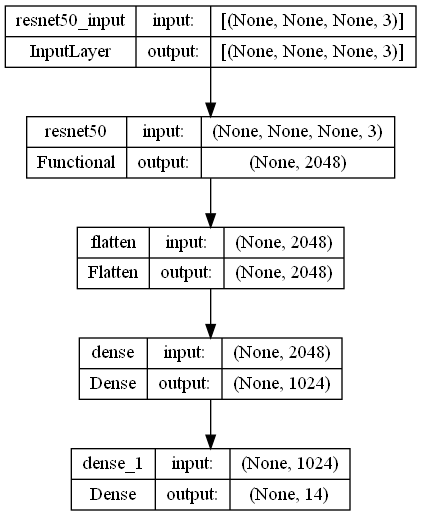

In [7]:
current_dir = os.getcwd()
path = os.path.join(current_dir, 'model.png')
plot_model(model, to_file=path, show_shapes=True, show_layer_names=True)

In [8]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # rescale pixel values to [0,1], and set aside 20% of the data for validation

In [9]:
# Load the training data
train_generator = datagen.flow_from_directory(
    'dataset',  # path to the dataset directory
    target_size=(224, 224),  # resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # for multi-class classification problems
    subset='training')  # set as training data

# Load the validation data
validation_generator = datagen.flow_from_directory(
    'dataset',  # path to the dataset directory
    target_size=(224, 224),  # resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # for multi-class classification problems
    subset='validation')  # set as validation data

Found 1108 images belonging to 14 classes.
Found 272 images belonging to 14 classes.


In [10]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=500)

Epoch 1/500
34/34 [==============================] - 10s 122ms/step - loss: 2.7008 - accuracy: 0.1506 - val_loss: 2.4213 - val_accuracy: 0.2422
Epoch 2/500
34/34 [==============================] - 3s 85ms/step - loss: 2.3671 - accuracy: 0.2203 - val_loss: 2.3507 - val_accuracy: 0.2188
Epoch 3/500
34/34 [==============================] - 3s 84ms/step - loss: 2.2487 - accuracy: 0.2612 - val_loss: 2.2651 - val_accuracy: 0.2930
Epoch 4/500
34/34 [==============================] - 3s 84ms/step - loss: 2.1496 - accuracy: 0.3020 - val_loss: 2.2289 - val_accuracy: 0.2500
Epoch 5/500
34/34 [==============================] - 3s 83ms/step - loss: 2.0933 - accuracy: 0.3141 - val_loss: 2.2714 - val_accuracy: 0.3086
Epoch 6/500
34/34 [==============================] - 3s 79ms/step - loss: 2.0586 - accuracy: 0.3225 - val_loss: 2.1846 - val_accuracy: 0.3008
Epoch 7/500
34/34 [==============================] - 3s 78ms/step - loss: 2.0292 - accuracy: 0.3299 - val_loss: 2.1946 - val_accuracy: 0.2461
Epoc

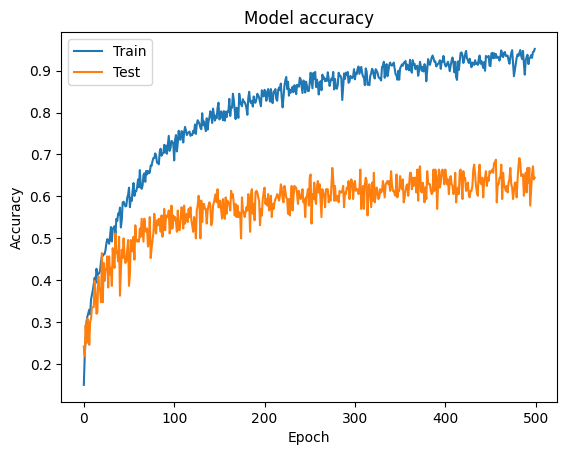

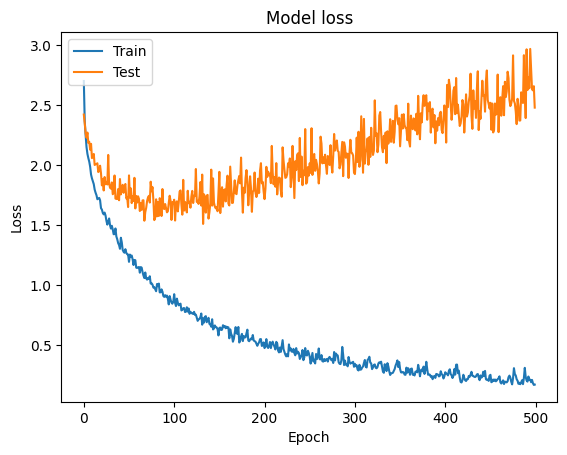

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()